#THEORY

# KNN and PCA Assignment

## 1. What is K-Nearest Neighbors (KNN) and how does it work
KNN is a **supervised learning algorithm** used for classification and regression. It stores all available cases and classifies a new case based on a similarity measure (e.g., distance). To predict, it finds the **'K' nearest points** to the input and performs **majority voting (classification)** or **averaging (regression)**.

## 2. What is the difference between KNN Classification and KNN Regression
- **KNN Classification**: Predicts the class label by **majority vote** among K-nearest neighbors.
- **KNN Regression**: Predicts a **continuous value** by averaging the values of K-nearest neighbors.

## 3. What is the role of the distance metric in KNN
The distance metric (like **Euclidean**, **Manhattan**, or **Minkowski**) determines how “close” two data points are. It directly affects the prediction, as it influences the choice of neighbors.

## 4. What is the Curse of Dimensionality in KNN
As the number of features (dimensions) increases, distances between points become less meaningful. All points tend to appear similarly distant, reducing KNN’s effectiveness.

## 5. How can we choose the best value of K in KNN
- Use **cross-validation** to test multiple K values.
- Plot **error rate vs K** to find the optimal value.
- A small K can overfit, and a large K can underfit.

## 6. What are KD Tree and Ball Tree in KNN
They are **data structures** used to speed up the nearest neighbor search:
- **KD Tree**: Works well with low-dimensional data.
- **Ball Tree**: Better for higher-dimensional datasets.

## 7. When should you use KD Tree vs. Ball Tree
- Use **KD Tree** when dimensions < 20.
- Use **Ball Tree** for higher dimensions or when KD Tree performance drops.

## 8. What are the disadvantages of KNN
- **Computationally expensive** at prediction time.
- **Sensitive to irrelevant features and outliers**.
- Requires **feature scaling**.
- Struggles with **high-dimensional data**.

## 9. How does feature scaling affect KNN
KNN is based on distance, so features with larger scales dominate. **Standardization or normalization** ensures all features contribute equally.

## 10. What is PCA (Principal Component Analysis)
PCA is a **dimensionality reduction technique** that transforms features into a new coordinate system, where the axes (principal components) capture the **maximum variance**.

## 11. How does PCA work
1. Standardize the data.
2. Compute the **covariance matrix**.
3. Calculate **eigenvalues and eigenvectors**.
4. Project data onto top eigenvectors (principal components).

## 12. What is the geometric intuition behind PCA
PCA finds the directions (axes) in the data that **capture the most spread** or **variance**, and rotates the dataset to align with these directions.

## 13. What are Eigenvalues and Eigenvectors in PCA
- **Eigenvectors** represent directions of maximum variance.
- **Eigenvalues** measure how much variance is along each eigenvector.

## 14. What is the difference between Feature Selection and Feature Extraction
- **Feature Selection**: Chooses a subset of the original features.
- **Feature Extraction**: Creates new features from the original ones (e.g., PCA).

## 15. How do you decide the number of components to keep in PCA
Use the **explained variance ratio** to decide how many components to retain (e.g., 95% variance). Plot the **cumulative explained variance** curve.

## 16. Can PCA be used for classification
Yes, PCA can be used for **dimensionality reduction before classification**. It improves speed and sometimes accuracy, though it may lose interpretability.

## 17. What are the limitations of PCA
- Assumes linear relationships.
- May discard important but low-variance features.
- Can make results **harder to interpret**.
- Not ideal when class labels are important (use LDA instead).

## 18. How do KNN and PCA complement each other
PCA can reduce dimensionality, making **KNN faster and less prone to overfitting**. It also helps eliminate correlated features and noise.

## 19. How does KNN handle missing values in a dataset
KNN doesn’t handle missing values natively. You should **impute missing values** (e.g., using mean, median, or KNN imputation) before using KNN.

## 20. What are the key differences between PCA and Linear Discriminant Analysis (LDA)?
- **PCA**: Unsupervised, maximizes variance.
- **LDA**: Supervised, maximizes class separability.
- PCA doesn't consider class labels; LDA does.
- PCA finds components with most variance; LDA finds components with best class separation.



#PRACTICAL

In [1]:
# 1. Train a KNN Classifier on the Iris dataset and print model accuracy
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=42)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("1. KNN Classifier Accuracy on Iris Dataset:", accuracy_score(y_test, y_pred))


1. KNN Classifier Accuracy on Iris Dataset: 1.0


In [2]:
# 2. Train a KNN Regressor on a synthetic dataset and evaluate using Mean Squared Error (MSE)
from sklearn.datasets import make_regression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

X, y = make_regression(n_samples=200, n_features=1, noise=15, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

knn_reg = KNeighborsRegressor(n_neighbors=5)
knn_reg.fit(X_train, y_train)
y_pred = knn_reg.predict(X_test)
print("2. KNN Regressor MSE:", mean_squared_error(y_test, y_pred))


2. KNN Regressor MSE: 437.3544619132517


In [5]:
# 3. Train a KNN Classifier using different distance metrics (Euclidean and Manhattan) and compare accuracy
from sklearn.datasets import load_iris  # Import Iris dataset
from sklearn.model_selection import train_test_split  # Import for data splitting
from sklearn.neighbors import KNeighborsClassifier  # Import KNN classifier
from sklearn.metrics import accuracy_score  # Import for accuracy calculation

# Load the Iris dataset specifically for this cell
iris = load_iris()
X, y = iris.data, iris.target  # Separate features (X) and target (y)

# Split the data for this classification task
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create classifiers with different distance metrics
knn_euclidean = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
knn_manhattan = KNeighborsClassifier(n_neighbors=3, metric='manhattan')

# Fit the classifiers using the Iris data
knn_euclidean.fit(X_train, y_train)
knn_manhattan.fit(X_train, y_train)

# Make predictions and calculate accuracy
acc_euclidean = accuracy_score(y_test, knn_euclidean.predict(X_test))
acc_manhattan = accuracy_score(y_test, knn_manhattan.predict(X_test))

# Print the results
print("3. Euclidean Accuracy:", acc_euclidean)
print("   Manhattan Accuracy:", acc_manhattan)

3. Euclidean Accuracy: 1.0
   Manhattan Accuracy: 1.0


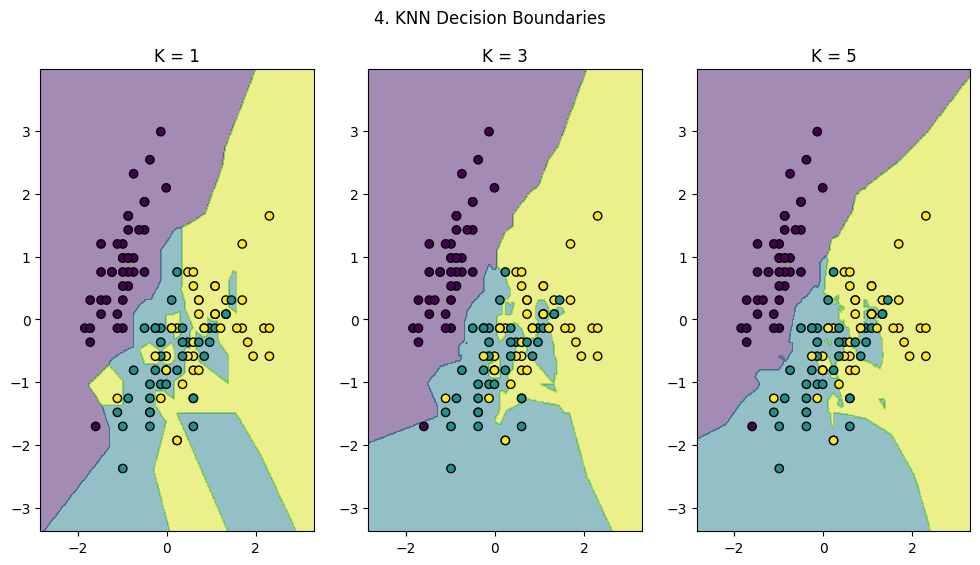

In [4]:
# 4. Train a KNN Classifier with different values of K and visualize decision boundaries
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler

# Using 2 features for visualization
X_vis = iris.data[:, :2]
y_vis = iris.target
X_train, X_test, y_train, y_test = train_test_split(X_vis, y_vis, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

plt.figure(figsize=(12, 6))
for i, k in enumerate([1, 3, 5]):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    # meshgrid
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))
    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.subplot(1, 3, i+1)
    plt.contourf(xx, yy, Z, alpha=0.5)
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors='k')
    plt.title(f"K = {k}")
plt.suptitle("4. KNN Decision Boundaries")
plt.show()


In [6]:
# 5. Apply Feature Scaling before training a KNN model and compare results with unscaled data
from sklearn.preprocessing import StandardScaler

knn_unscaled = KNeighborsClassifier(n_neighbors=3)
knn_unscaled.fit(X_train, y_train)
acc_unscaled = accuracy_score(y_test, knn_unscaled.predict(X_test))

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn_scaled = KNeighborsClassifier(n_neighbors=3)
knn_scaled.fit(X_train_scaled, y_train)
acc_scaled = accuracy_score(y_test, knn_scaled.predict(X_test_scaled))

print("5. Accuracy without scaling:", acc_unscaled)
print("   Accuracy with scaling:", acc_scaled)


5. Accuracy without scaling: 1.0
   Accuracy with scaling: 1.0


In [7]:
# 6. Train a PCA model on synthetic data and print the explained variance ratio for each component
from sklearn.decomposition import PCA

X_synthetic, _ = make_regression(n_samples=100, n_features=5, noise=10)
pca = PCA()
pca.fit(X_synthetic)

print("6. Explained Variance Ratio:", pca.explained_variance_ratio_)


6. Explained Variance Ratio: [0.2451868  0.22780266 0.19067871 0.1769595  0.15937234]


In [8]:
# 7. Apply PCA before training a KNN Classifier and compare accuracy with and without PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(iris.data)
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, iris.target, test_size=0.2, random_state=42)

knn_pca = KNeighborsClassifier(n_neighbors=3)
knn_pca.fit(X_train_pca, y_train_pca)
acc_pca = accuracy_score(y_test_pca, knn_pca.predict(X_test_pca))

knn_original = KNeighborsClassifier(n_neighbors=3)
knn_original.fit(X_train, y_train)
acc_original = accuracy_score(y_test, knn_original.predict(X_test))

print("7. Accuracy without PCA:", acc_original)
print("   Accuracy with PCA:", acc_pca)


7. Accuracy without PCA: 1.0
   Accuracy with PCA: 1.0


In [9]:
# 8. Perform Hyperparameter Tuning on a KNN Classifier using GridSearchCV
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': [1, 3, 5, 7], 'metric': ['euclidean', 'manhattan']}
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid.fit(iris.data, iris.target)

print("8. Best Params:", grid.best_params_)
print("   Best Score:", grid.best_score_)


8. Best Params: {'metric': 'euclidean', 'n_neighbors': 7}
   Best Score: 0.9800000000000001


In [10]:
# 9. Train a KNN Classifier and check the number of misclassified samples
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
misclassified = (y_test != y_pred).sum()
print("9. Number of misclassified samples:", misclassified)


9. Number of misclassified samples: 0


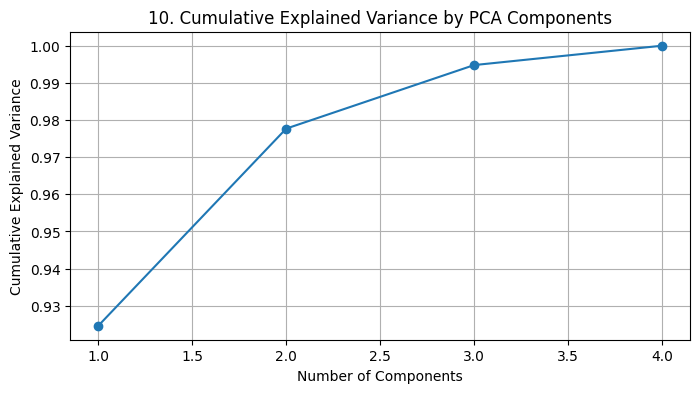

In [11]:
# 10. Train a PCA model and visualize the cumulative explained variance
pca = PCA().fit(iris.data)
cum_var = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(8, 4))
plt.plot(range(1, len(cum_var)+1), cum_var, marker='o')
plt.title("10. Cumulative Explained Variance by PCA Components")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid(True)
plt.show()


In [12]:
# 11. KNN Classifier with different weights (uniform vs. distance)
knn_uniform = KNeighborsClassifier(weights='uniform')
knn_distance = KNeighborsClassifier(weights='distance')

knn_uniform.fit(X_train, y_train)
knn_distance.fit(X_train, y_train)

acc_uniform = accuracy_score(y_test, knn_uniform.predict(X_test))
acc_distance = accuracy_score(y_test, knn_distance.predict(X_test))

print("11. Accuracy with uniform weights:", acc_uniform)
print("    Accuracy with distance weights:", acc_distance)


11. Accuracy with uniform weights: 1.0
    Accuracy with distance weights: 1.0


In [13]:
# 12. KNN Regressor and effect of different K values
for k in [1, 3, 5, 10, 20]:
    reg = KNeighborsRegressor(n_neighbors=k)
    reg.fit(X_train, y_train)
    pred = reg.predict(X_test)
    mse = mean_squared_error(y_test, pred)
    print(f"12. K={k}, MSE: {mse}")


12. K=1, MSE: 0.0
12. K=3, MSE: 0.007407407407407404
12. K=5, MSE: 0.007999999999999997
12. K=10, MSE: 0.01333333333333333
12. K=20, MSE: 0.018666666666666665


In [14]:
# 13. KNN Imputation for missing values
import numpy as np
from sklearn.impute import KNNImputer

X_missing = iris.data.copy()
rng = np.random.RandomState(42)
X_missing[rng.randint(0, X_missing.shape[0], 10), rng.randint(0, X_missing.shape[1], 10)] = np.nan

imputer = KNNImputer(n_neighbors=3)
X_imputed = imputer.fit_transform(X_missing)

print("13. Sample Imputed Data:\n", X_imputed[:5])


13. Sample Imputed Data:
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


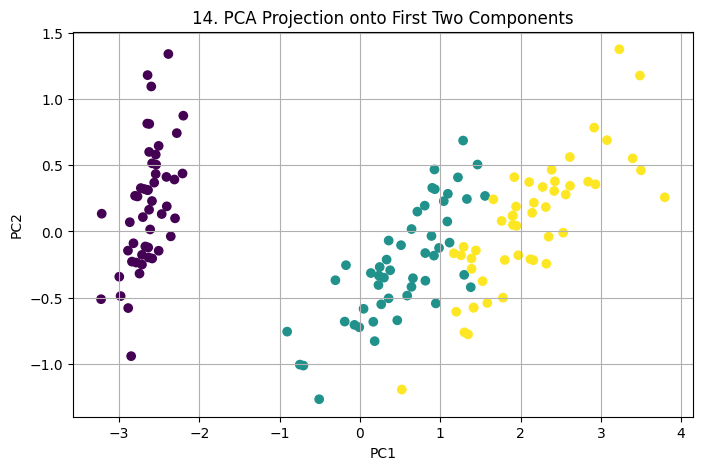

In [15]:
# 14. PCA projection visualization
X_pca = PCA(n_components=2).fit_transform(iris.data)

plt.figure(figsize=(8, 5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=iris.target, cmap='viridis')
plt.title("14. PCA Projection onto First Two Components")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.show()


In [16]:
# 15. KNN Classifier using KD Tree and Ball Tree
knn_kd = KNeighborsClassifier(algorithm='kd_tree')
knn_ball = KNeighborsClassifier(algorithm='ball_tree')

knn_kd.fit(X_train, y_train)
knn_ball.fit(X_train, y_train)

acc_kd = accuracy_score(y_test, knn_kd.predict(X_test))
acc_ball = accuracy_score(y_test, knn_ball.predict(X_test))

print("15. KD Tree Accuracy:", acc_kd)
print("    Ball Tree Accuracy:", acc_ball)


15. KD Tree Accuracy: 1.0
    Ball Tree Accuracy: 1.0


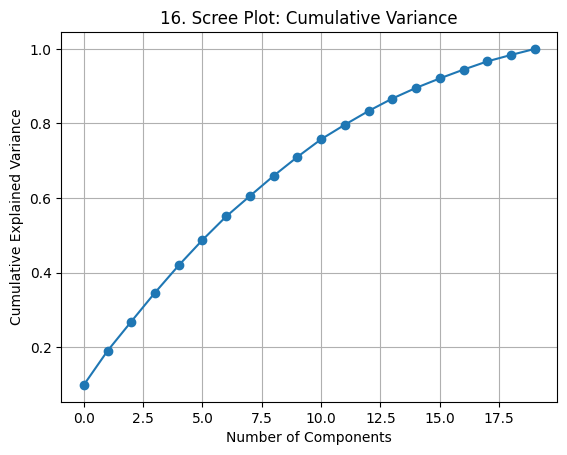

In [17]:
# 16. PCA on high-dimensional data with Scree plot
X_hd, _ = make_regression(n_samples=100, n_features=20, noise=5)
pca_hd = PCA().fit(X_hd)

plt.plot(np.cumsum(pca_hd.explained_variance_ratio_), marker='o')
plt.title("16. Scree Plot: Cumulative Variance")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid(True)
plt.show()


In [18]:
# 17. KNN Classifier with Precision, Recall, and F1-score
from sklearn.metrics import classification_report

y_pred = knn.predict(X_test)
print("17. Classification Report:\n", classification_report(y_test, y_pred))


17. Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [19]:
# 18. PCA effect of number of components on accuracy
for n in [1, 2, 3, 4]:
    pca = PCA(n_components=n)
    X_pca = pca.fit_transform(iris.data)
    X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(X_pca, iris.target, test_size=0.2, random_state=42)
    knn = KNeighborsClassifier(n_neighbors=3)
    knn.fit(X_train_p, y_train_p)
    acc = accuracy_score(y_test_p, knn.predict(X_test_p))
    print(f"18. Components={n}, Accuracy={acc}")


18. Components=1, Accuracy=0.9333333333333333
18. Components=2, Accuracy=1.0
18. Components=3, Accuracy=1.0
18. Components=4, Accuracy=1.0


In [20]:
# 19. KNN with different leaf_size
for leaf in [10, 30, 50]:
    knn = KNeighborsClassifier(leaf_size=leaf)
    knn.fit(X_train, y_train)
    acc = accuracy_score(y_test, knn.predict(X_test))
    print(f"19. Leaf size={leaf}, Accuracy={acc}")


19. Leaf size=10, Accuracy=1.0
19. Leaf size=30, Accuracy=1.0
19. Leaf size=50, Accuracy=1.0


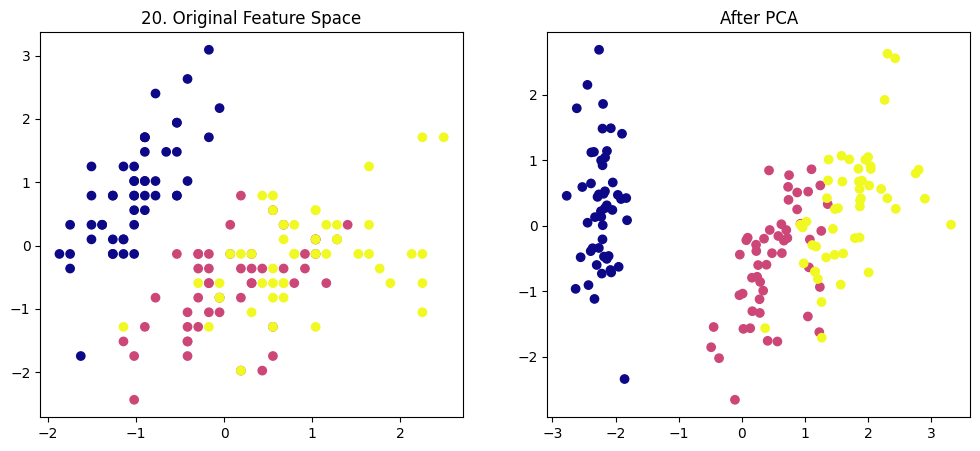

In [21]:
# 20. PCA transformation before and after visualization
X_std = StandardScaler().fit_transform(iris.data)
X_pca = PCA(n_components=2).fit_transform(X_std)

fig, axs = plt.subplots(1, 2, figsize=(12, 5))
axs[0].scatter(X_std[:, 0], X_std[:, 1], c=iris.target, cmap='plasma')
axs[0].set_title("20. Original Feature Space")

axs[1].scatter(X_pca[:, 0], X_pca[:, 1], c=iris.target, cmap='plasma')
axs[1].set_title("After PCA")
plt.show()


In [22]:
# 21. KNN Classifier on Wine dataset with classification report
from sklearn.datasets import load_wine

wine = load_wine()
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.2, random_state=42)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print("21. Classification Report (Wine Dataset):\n", classification_report(y_test, y_pred))


21. Classification Report (Wine Dataset):
               precision    recall  f1-score   support

           0       0.86      0.86      0.86        14
           1       0.79      0.79      0.79        14
           2       0.38      0.38      0.38         8

    accuracy                           0.72        36
   macro avg       0.67      0.67      0.67        36
weighted avg       0.72      0.72      0.72        36



In [23]:
# 22. KNN Regressor: Effect of different distance metrics on prediction error
for metric in ['euclidean', 'manhattan', 'chebyshev']:
    reg = KNeighborsRegressor(n_neighbors=5, metric=metric)
    reg.fit(X_train, y_train)
    mse = mean_squared_error(y_test, reg.predict(X_test))
    print(f"22. Metric={metric}, MSE={mse}")


22. Metric=euclidean, MSE=0.29
22. Metric=manhattan, MSE=0.21666666666666667
22. Metric=chebyshev, MSE=0.28777777777777774


In [24]:
# 23. KNN Classifier evaluated using ROC-AUC score
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize

y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
y_score = knn.predict_proba(X_test)

roc_auc = roc_auc_score(y_test_bin, y_score, multi_class='ovr')
print("23. ROC-AUC Score:", roc_auc)


23. ROC-AUC Score: 0.8828463203463204


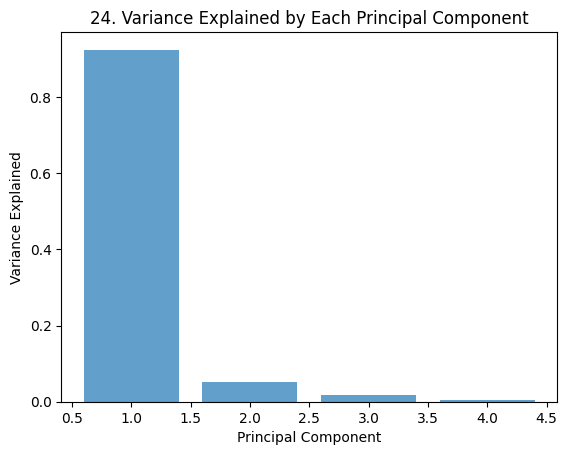

In [25]:
# 24. PCA model: Visualize variance captured by each component
pca = PCA()
pca.fit(iris.data)

plt.bar(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_, alpha=0.7)
plt.xlabel("Principal Component")
plt.ylabel("Variance Explained")
plt.title("24. Variance Explained by Each Principal Component")
plt.show()


In [26]:
# 25. KNN Classifier with feature selection
from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(score_func=f_classif, k=2)
X_new = selector.fit_transform(iris.data, iris.target)

X_train, X_test, y_train, y_test = train_test_split(X_new, iris.target, test_size=0.2, random_state=42)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

acc = accuracy_score(y_test, knn.predict(X_test))
print("25. Accuracy with Feature Selection:", acc)


25. Accuracy with Feature Selection: 1.0


In [27]:
# 26. PCA: Visualize data reconstruction error after reducing dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)
X_reconstructed = pca.inverse_transform(X_pca)

reconstruction_error = np.mean((X_std - X_reconstructed) ** 2)
print("26. Reconstruction Error:", reconstruction_error)


26. Reconstruction Error: 0.041867927999983595


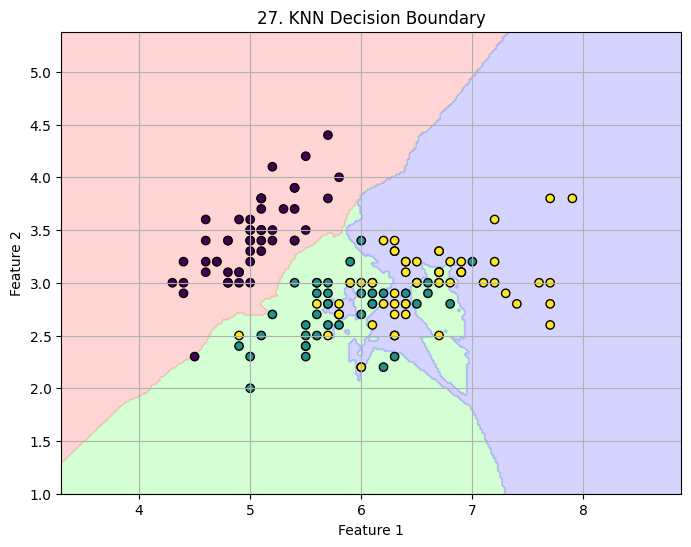

In [28]:
# 27. KNN Classifier: Visualize decision boundary
from matplotlib.colors import ListedColormap

X_vis = iris.data[:, :2]  # use first two features
y_vis = iris.target
X_train, X_test, y_train, y_test = train_test_split(X_vis, y_vis, test_size=0.2, random_state=42)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

h = .02
x_min, x_max = X_vis[:, 0].min() - 1, X_vis[:, 0].max() + 1
y_min, y_max = X_vis[:, 1].min() - 1, X_vis[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.figure(figsize=(8, 6))
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.5)
plt.scatter(X_vis[:, 0], X_vis[:, 1], c=y_vis, edgecolor='k')
plt.title("27. KNN Decision Boundary")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()


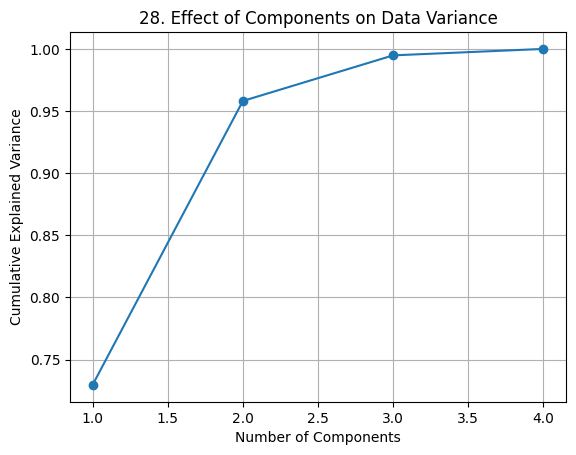

In [29]:
# 28. PCA: Analyze effect of number of components on data variance
pca = PCA().fit(X_std)

plt.plot(np.arange(1, len(pca.explained_variance_ratio_)+1), np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("28. Effect of Components on Data Variance")
plt.grid(True)
plt.show()
